In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### Power Plant Cleaning

In [67]:
power_plant_path = os.path.join("Data", "global_power_plant_database.csv")

power_plant_df = pd.read_csv(power_plant_path, low_memory=False)

In [8]:
power_plant_df.head()



,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [9]:
power_plant_df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

In [68]:
columns_names = ['country_long', 'name', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017']

power_plant_df = power_plant_df[columns_names]
power_plant_df.head()

,country_long,name,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50
1,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29
2,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80


In [17]:
missing_values_count_us = power_plant_df[power_plant_df['country_long'] =='United States of America'].isnull().sum()
missing_values_count_us

country_long                        0
name                                0
capacity_mw                         0
latitude                            0
longitude                           0
primary_fuel                        0
generation_gwh_2013              3688
generation_gwh_2014              3271
generation_gwh_2015              2822
generation_gwh_2016              2087
generation_gwh_2017              1463
generation_gwh_2018               883
generation_gwh_2019               174
generation_data_source            118
estimated_generation_gwh_2013    7230
estimated_generation_gwh_2014    6932
estimated_generation_gwh_2015    6595
estimated_generation_gwh_2016    6239
estimated_generation_gwh_2017     302
dtype: int64

In [16]:
power_plant_df['country_long'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Chile', 'China', 'Colombia', 'Congo',
       'Costa Rica', 'Cote DIvoire', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ira

In [18]:
power_plant_df[power_plant_df['country_long'] =='United States of America'].shape

(9833, 19)

In [19]:
power_plant_df['primary_fuel'].unique()

array(['Hydro', 'Solar', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Storage', 'Cogeneration'], dtype=object)

In [69]:
# generating country ids

country_ids = {}

country_list = power_plant_df['country_long'].unique()

count = 0
for country in country_list:
    country_ids[country] = count
    count += 1

country_ids

{'Afghanistan': 0,
 'Albania': 1,
 'Algeria': 2,
 'Angola': 3,
 'Antarctica': 4,
 'Argentina': 5,
 'Armenia': 6,
 'Australia': 7,
 'Austria': 8,
 'Azerbaijan': 9,
 'Bahrain': 10,
 'Bangladesh': 11,
 'Belarus': 12,
 'Belgium': 13,
 'Benin': 14,
 'Bhutan': 15,
 'Bolivia': 16,
 'Bosnia and Herzegovina': 17,
 'Botswana': 18,
 'Brazil': 19,
 'Brunei Darussalam': 20,
 'Bulgaria': 21,
 'Burkina Faso': 22,
 'Burundi': 23,
 'Cambodia': 24,
 'Cameroon': 25,
 'Canada': 26,
 'Cape Verde': 27,
 'Central African Republic': 28,
 'Chile': 29,
 'China': 30,
 'Colombia': 31,
 'Congo': 32,
 'Costa Rica': 33,
 'Cote DIvoire': 34,
 'Croatia': 35,
 'Cuba': 36,
 'Cyprus': 37,
 'Czech Republic': 38,
 'Democratic Republic of the Congo': 39,
 'Denmark': 40,
 'Djibouti': 41,
 'Dominican Republic': 42,
 'Ecuador': 43,
 'Egypt': 44,
 'El Salvador': 45,
 'Equatorial Guinea': 46,
 'Eritrea': 47,
 'Estonia': 48,
 'Ethiopia': 49,
 'Fiji': 50,
 'Finland': 51,
 'France': 52,
 'French Guiana': 53,
 'Gabon': 54,
 'Gambia'

In [70]:
power_plant_df['country_id'] = ''

for index, row in power_plant_df.iterrows():

    if row[0] in country_list:
        power_plant_df.loc[power_plant_df['country_long'] == row[0], 'country_id'] = country_ids[row[0]]

power_plant_df.head()


,country_long,name,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,country_id
0,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.77,162.90,97.39,137.76,119.50,0
1,Afghanistan,Kandahar DOG,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.43,17.48,18.25,17.70,18.29,0
2,Afghanistan,Kandahar JOL,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.64,17.58,19.10,17.62,18.72,0
3,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.06,203.55,146.90,230.18,174.91,0
4,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,406.16,357.22,270.99,395.38,350.80,0


In [71]:
power_plant_df['country_id'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166],
      dtype=object)

### Greenhouse Gas Cleaning

In [21]:
greenhouse_path = os.path.join("Data", "greenhouse_gas_inventory_data_data.csv")

greenhouse_df = pd.read_csv(greenhouse_path, low_memory=False)

In [22]:
greenhouse_df.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [23]:
greenhouse_df['category'].unique()

array(['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent',
       'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent',
       'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent',
       'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent',
       'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'],
      dtype=obj

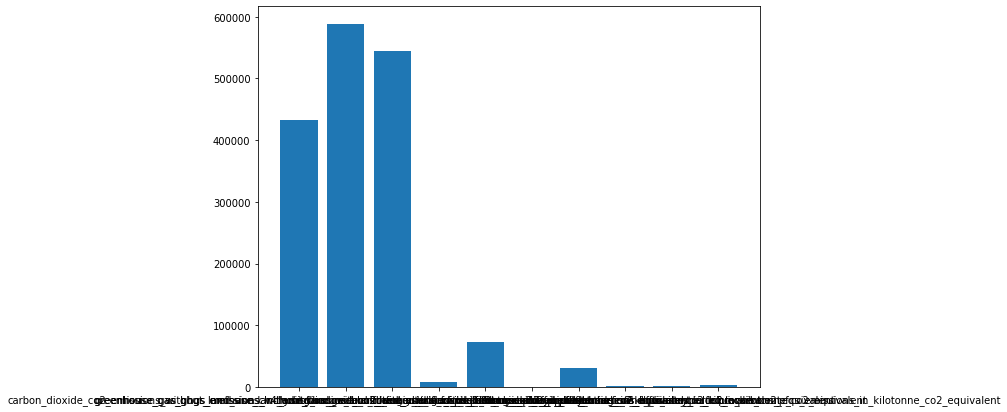

In [32]:
category_df= greenhouse_df.groupby('category').mean()

category_df.index
fig, ax = plt.subplots(1,1, figsize= (9,7))

ax.bar(category_df.index, category_df['value'])


plt.show()

In [33]:
greenhouse_df['category'].unique()

array(['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent',
       'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent',
       'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent',
       'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent',
       'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'],
      dtype=obj

In [34]:
index_names_green = ['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent','greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',        'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent',
       'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent',
       'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent',
       'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent',
       'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent']

greenhouse_df.head()

,country_or_area,year,value,category
0,Australia,2014,393126.946994,carbon_dioxide_co2_emissions_without_land_use_...
1,Australia,2013,396913.936530,carbon_dioxide_co2_emissions_without_land_use_...
2,Australia,2012,406462.847704,carbon_dioxide_co2_emissions_without_land_use_...
3,Australia,2011,403705.528314,carbon_dioxide_co2_emissions_without_land_use_...
4,Australia,2010,406200.993184,carbon_dioxide_co2_emissions_without_land_use_...


In [36]:
greenhouse_df = greenhouse_df.set_index('category')
greenhouse_df.head()

,country_or_area,year,value
category,,,
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,Australia,2014,393126.946994
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,Australia,2013,396913.936530
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,Australia,2012,406462.847704
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,Australia,2011,403705.528314
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,Australia,2010,406200.993184


In [37]:
greenhouse_df =greenhouse_df.drop(axis = 0, index = ['greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent'])
greenhouse_df.head()

,country_or_area,year,value
category,,,
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,Australia,2014,393126.946994
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,Australia,2013,396913.936530
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,Australia,2012,406462.847704
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,Australia,2011,403705.528314
carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent,Australia,2010,406200.993184


In [40]:
greenhouse_df.index.unique()

Index(['carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent',
       'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent',
       'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent',
       'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent',
       'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent',
       'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent'],
      dtype='object', name='category')

In [42]:
greenhouse_df.reset_index()

,category,country_or_area,year,value
0,carbon_dioxide_co2_emissions_without_land_use_...,Australia,2014,393126.946994
1,carbon_dioxide_co2_emissions_without_land_use_...,Australia,2013,396913.936530
2,carbon_dioxide_co2_emissions_without_land_use_...,Australia,2012,406462.847704
3,carbon_dioxide_co2_emissions_without_land_use_...,Australia,2011,403705.528314
4,carbon_dioxide_co2_emissions_without_land_use_...,Australia,2010,406200.993184
...,...,...,...,...
7452,unspecified_mix_of_hydrofluorocarbons_hfcs_and...,United States of America,1994,593.222570
7453,unspecified_mix_of_hydrofluorocarbons_hfcs_and...,United States of America,1993,586.939752
7454,unspecified_mix_of_hydrofluorocarbons_hfcs_and...,United States of America,1992,574.414624
7455,unspecified_mix_of_hydrofluorocarbons_hfcs_and...,United States of America,1991,566.900968


In [46]:
greenhouse_df['country_or_area'].unique()

array(['Australia', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Canada',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom',
       'United States of America'], dtype=object)